In [1]:
library(edgeR)
library(limma)
library(Glimma)
library(Biobase)
library(phantasus)
targets <-read.gct("PAAD_Clean.gct")
ourdata <- targets[, targets$vital_status %in% c("alive","dead")]
ourdata$vital_status=factor(ourdata$vital_status)
ourdata$vital_status
design <- model.matrix(~ ourdata$vital_status - 1)
colnames(design) <- c("alive", "dead")
fit <- lmFit(ourdata, design)
contrast.matrix <- makeContrasts("alive-dead", levels = design)
contrast.matrix
fit2C <- contrasts.fit(fit, contrast.matrix)
fit2C <- eBayes(fit2C)
topTable(fit2C)
dt <- decideTests(fit2C)
glMDPlot(fit2C, status=dt, groups=ourdata$vital_status, side.main="Symbols")
summary(dt)

Warning message:
"package 'edgeR' was built under R version 3.6.2"Loading required package: limma
Warning message:
"package 'limma' was built under R version 3.6.2"Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from 'package:limma':

    plotMA

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbin

[1] dead  alive dead  alive dead  dead  alive dead  alive alive alive alive
 [13] alive alive alive dead  dead  dead  dead  dead  dead  dead  alive alive
 [25] alive dead  dead  dead  alive alive alive alive alive alive alive dead 
 [37] alive alive dead  alive alive dead  dead  alive dead  dead  dead  alive
 [49] dead  alive dead  alive dead  dead  dead  dead  dead  dead  alive dead 
 [61] dead  alive dead  dead  dead  dead  dead  alive alive dead  dead  alive
 [73] dead  dead  alive alive dead  alive alive alive dead  dead  alive dead 
 [85] dead  alive alive alive dead  dead  alive dead  dead  dead  dead  dead 
 [97] alive dead  dead  dead  alive alive dead  alive alive dead  alive alive
[109] alive alive alive alive dead  dead  dead  dead  dead  dead  alive dead 
[121] alive dead  dead  dead  dead  dead  dead  dead  dead  alive alive dead 
[133] alive dead  dead  alive alive dead  dead  alive alive dead  dead  alive
[145] dead  alive alive alive alive alive dead  dead  dead  alive dead  alive
[157] dead  dead  alive alive dead  alive alive alive alive dead  dead  alive
[169] dead  dead  dead  dead  alive alive dead  alive alive alive alive alive
[181] alive alive alive
Levels: alive dead

,alive-dead
alive,1
dead,-1


,id,logFC,AveExpr,t,P.Value,adj.P.Val,B
HLA-A,HLA-A,-1.0468541,11.321858,-5.868775,2.009171e-08,0.0002832530,8.902052
NCKIPSD,NCKIPSD,0.4174282,6.591257,5.630975,6.615925e-08,0.0004663565,7.807613
APCDD1L,APCDD1L,-0.8184330,7.603279,-5.520567,1.138034e-07,0.0005348002,7.310046
CUL1,CUL1,-0.8575359,6.692896,-5.441314,1.672436e-07,0.0005834546,6.957130
NFE2L3,NFE2L3,0.5822608,10.028415,5.369305,2.365180e-07,0.0005834546,6.639603
GRAMD2,GRAMD2,0.7067464,9.210383,5.318817,3.010193e-07,0.0005834546,6.418772
IGSF8,IGSF8,0.3563397,9.708197,5.299974,3.292393e-07,0.0005834546,6.336735
CACNG3,CACNG3,-0.9188995,5.963388,-5.298797,3.310850e-07,0.0005834546,6.331618
NPIP,NPIP,0.6304545,7.943169,5.266214,3.863701e-07,0.0006052273,6.190281
MYOM1,MYOM1,-0.7549522,10.103279,-5.190833,5.509070e-07,0.0007766687,5.865724


       alive-dead
Down          920
NotSig      11958
Up           1220

In [2]:
summary(dt)


       alive-dead
Down          920
NotSig      11958
Up           1220

First we take select a feature from the given genomic data here we take Vital status which says if the person is alive or dead and a design matrix is constructed.I use the limma package for analysing differential gene expression.The top diiferentially expressed genes are shown above.
Then using the glimma library interactive Glimma’s interactive MD plot displays gene-wise log2-fold changes (logFCs) against average expression values together with a plot of sample expression. This allows users to
see summarised results from all of the genes as a whole whilst being able to scrutinise the
expression of individual genes at the same time.

After running the above cell an interactive HTML plot is generated where gene-wise logFCs are plotted against mean expression values  Significantly up- and down-regulated genes are highlighted in
red and blue respectively. A table of associated gene information is displayed 

Im also including the interactive plot in github repo 

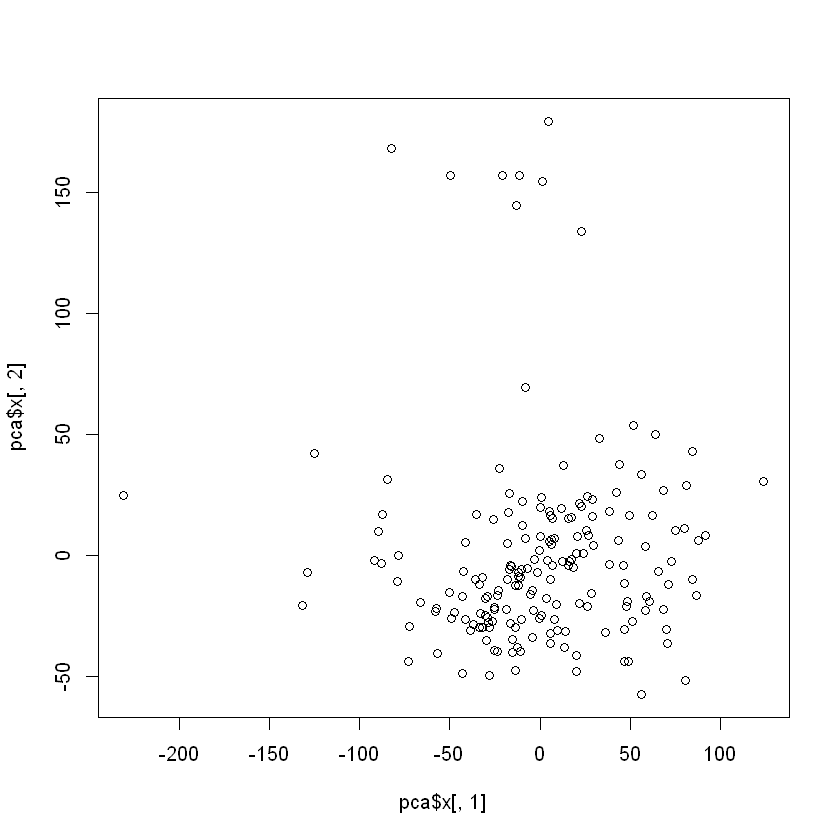

In [2]:
m <- exprs(targets)
pca <-prcomp(t(m),scale=TRUE)
plot(pca$x[,1], pca$x[,2])

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

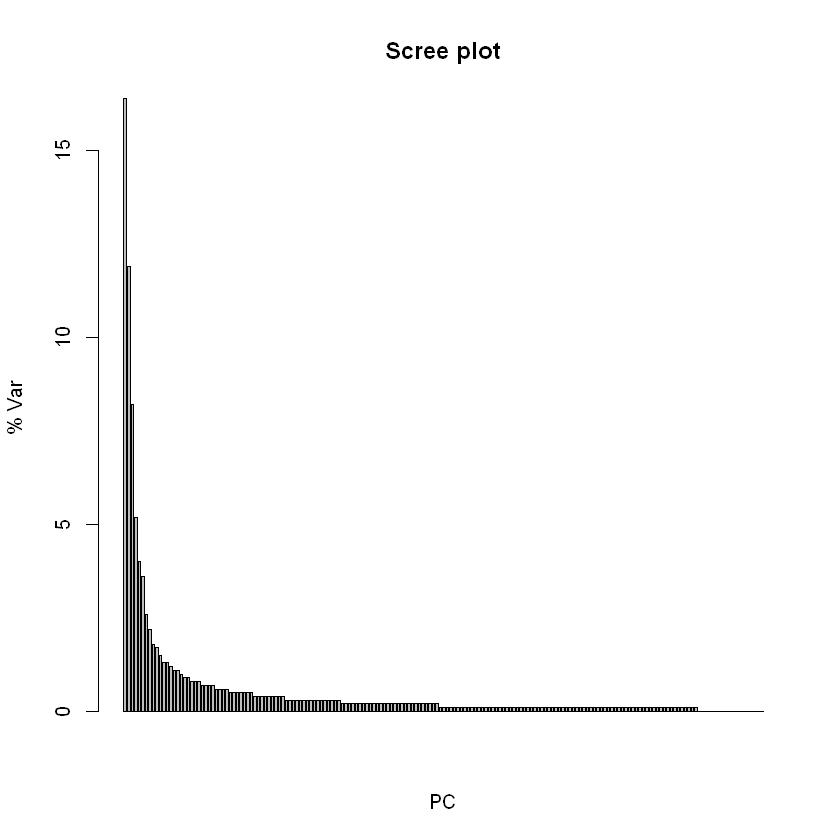

In [3]:
pca.var<-pca$sdev^2
pca.var.per <-round(pca.var/sum(pca.var)*100,1)
barplot(pca.var.per,main = "Scree plot",xlab = "PC",ylab = "% Var")
library(ggplot2)


we Can very well see PC1 contributes majorly

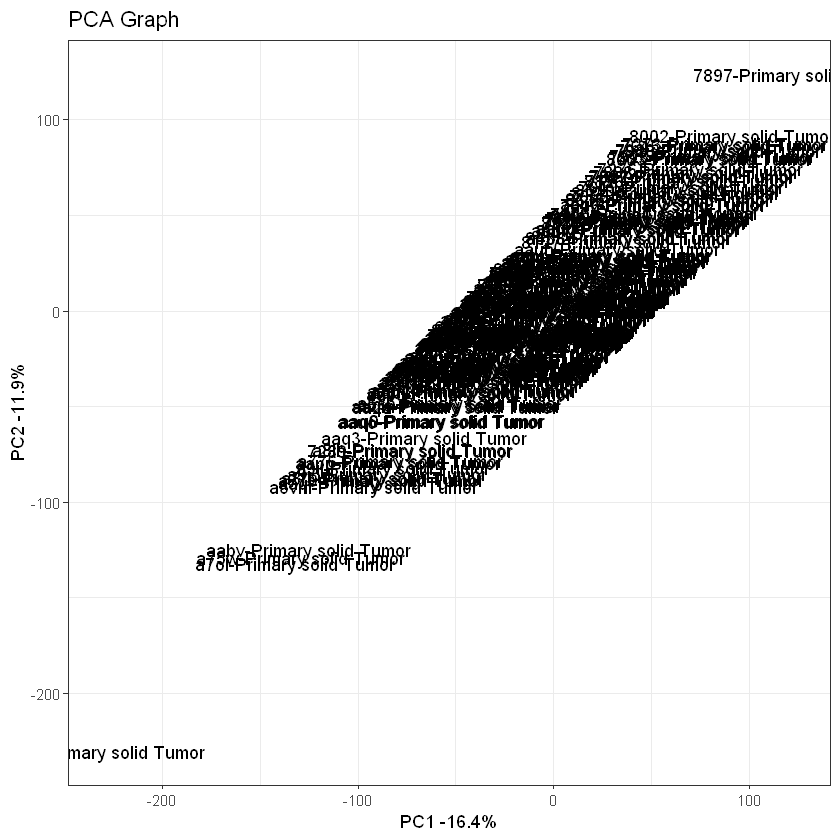

In [4]:

pca.data <-data.frame(Sample=rownames(pca$x),X=pca$x[,1],Y=pca$x[,1])
ggplot(data = pca.data,aes(x=X,y=Y,label=Sample))+ geom_text()+ xlab(paste("PC1 -",pca.var.per[1],"%",sep = ""))+ylab(paste("PC2 -",pca.var.per[2],"%",sep = ""))+theme_bw()+ggtitle("PCA Graph")

In [6]:
loading_scores<-pca$rotation[,1]
genescores<-abs(loading_scores)
gene_scored_rank<-sort(genescores,decreasing = TRUE)
top_genes<-names(gene_scored_rank[1:10])
top_genes

[1] "FLVCR2"   "PIP"      "HIPK2"    "HLA-DPB1" "GSPT2"    "MRPS15"  
 [7] "CXorf65"  "BAZ2B"    "PRPF40B"  "RAB34"

These genes have the highest effect and can be considered significant